In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import make_classification, make_moons, make_circles
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.utils import to_categorical

from src.nn import Dense as mDense
from src.nn import Dropout as mDropout
from src.nn import ReLU, Softmax, NeuralNetwork

%matplotlib inline

np.seterr(all='raise')
np.random.seed(42)

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

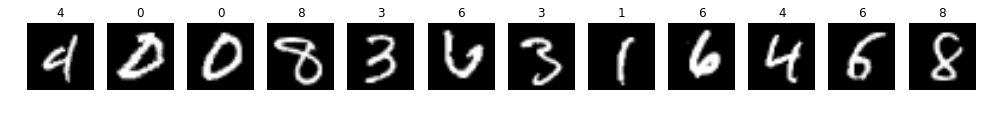

In [3]:
plt.figure(figsize=(17, 8))
indexes = np.random.randint(0, 60000, 12)
for i, idx in enumerate(indexes):
    label = y_train[idx]
    image = x_train[idx]
    plt.subplot(2, 12, i + 1)
    plt.axis('off')
    plt.imshow(image, cmap='gray', interpolation='bilinear')
    plt.title('%i' % label)

In [4]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))
input_shape = (x_train.shape[1], )
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255

In [23]:
model = Sequential()
model.add(Dense(100, input_shape=input_shape, activation=tf.nn.relu))
# # model.add(Dropout(0.5))
# model.add(Dense(100, activation=tf.nn.relu))
# # model.add(Dropout(0.5))
model.add(Dense(10, activation=tf.nn.softmax))
model.compile(loss='sparse_categorical_crossentropy' , optimizer='sgd', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=15, batch_size=32)
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

y_pred = np.argmax(model.predict_(x_test), axis=-1)
print("Classification report for classifier \n%s\n"
      % (classification_report(y_test, y_pred)))
print('-' * 20)
print("Confusion matrix:\n%s" % confusion_matrix(y_test, y_pred))

Epoch 1/15
60000/60000 [==============================] - 3s 47us/sample - loss: 0.6412 - acc: 0.8378
Epoch 2/15
60000/60000 [==============================] - 3s 49us/sample - loss: 0.3396 - acc: 0.9049
Epoch 3/15
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2936 - acc: 0.9170
Epoch 4/15
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2647 - acc: 0.9258
Epoch 5/15
60000/60000 [==============================] - 3s 46us/sample - loss: 0.2438 - acc: 0.9314
Epoch 6/15
60000/60000 [==============================] - 3s 48us/sample - loss: 0.2259 - acc: 0.9367
Epoch 7/15
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2107 - acc: 0.9412
Epoch 8/15
60000/60000 [==============================] - 3s 48us/sample - loss: 0.1975 - acc: 0.9450
Epoch 9/15
60000/60000 [==============================] - 3s 48us/sample - loss: 0.1858 - acc: 0.9480
Epoch 10/15
60000/60000 [==============================] - 3s 49us/sample - loss: 

AttributeError: 'Sequential' object has no attribute 'predict_'

--------------------
Treinamento:
Epoch 1/15 =======> loss: 3.57689 - acc: 0.95175
Epoch 2/15 =======> loss: 2.24275 - acc: 0.96527
Epoch 3/15 =======> loss: 1.94818 - acc: 0.97097
Epoch 4/15 =======> loss: 1.79187 - acc: 0.96998
Epoch 5/15 =======> loss: 1.66277 - acc: 0.97967
Epoch 6/15 =======> loss: 1.57013 - acc: 0.97878
Epoch 7/15 =======> loss: 1.54046 - acc: 0.98325
Epoch 8/15 =======> loss: 1.39781 - acc: 0.98158
Epoch 9/15 =======> loss: 1.34676 - acc: 0.98285
Epoch 10/15 =======> loss: 1.31358 - acc: 0.98323
Epoch 11/15 =======> loss: 1.24672 - acc: 0.98485
Epoch 12/15 =======> loss: 1.205 - acc: 0.98758
Epoch 13/15 =======> loss: 1.21236 - acc: 0.98687
Epoch 14/15 =======> loss: 1.15138 - acc: 0.98728
Epoch 15/15 =======> loss: 1.15555 - acc: 0.98752
--------------------
Acurácia: 97.17%
Classification report for classifier 
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.97      0.99      0.9

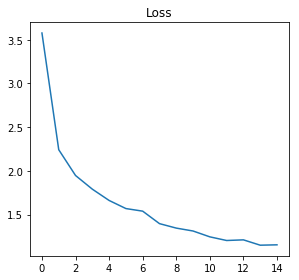

In [11]:
final_error = []
better_acc = 0

layers = (
    mDense(inputs=x_train.shape[1], outputs=100, activation=ReLU()),
    # mDense(inputs=100, outputs=100, activation=ReLU()),
    mDense(inputs=100, outputs=10, activation=Softmax()),
)

md = NeuralNetwork(
    layers,
    x_train.copy(),
    y_train.copy(),
    loss='cross_entropy',
    batch_size=32,
    epochs=15,
    lr=1e-1)

print('-' * 20)
print('Treinamento:')
error = md.train()

y_pred = md.predict(x_test.copy())
acc = np.round((np.sum(y_pred == y_test) / len(y_test)) * 100, 2)
if acc > better_acc:
    better_acc = acc
final_error = error
print('-' * 20)
print(f'Acurácia: {acc}%')

print("Classification report for classifier \n%s\n"
      % (classification_report(y_test, y_pred)))
print('-' * 20)
print("Confusion matrix:\n%s" % confusion_matrix(y_test, y_pred))

if len(final_error):
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.title(f'Loss')
    plt.plot(range(len(final_error)), final_error)
    plt.tight_layout()
    plt.show()